In [1]:
# 参考 https://note.nkmk.me/python-sklearn-confusion-matrix-score/

# 1. 混同行列

## ２クラス

In [2]:
from sklearn.metrics import confusion_matrix

y_true = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 1, 1, 1, 0, 0, 0, 1, 1]

cm = confusion_matrix(y_true, y_pred, labels=[0, 1])

print(cm)


[[1 4]
 [3 2]]


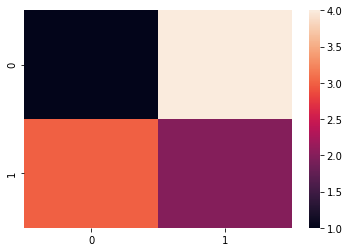

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm)
plt.show()

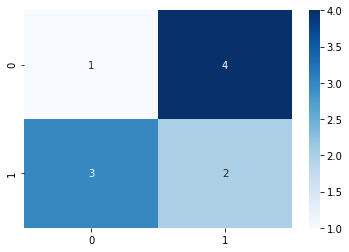

In [4]:
sns.heatmap(cm, annot=True, cmap='Blues')
plt.show()

## 多クラス

In [5]:
y_true_multi = [0, 0, 0, 1, 1, 1, 2, 2, 2]
y_pred_multi = [0, 1, 1, 1, 1, 2, 2, 2, 2]

print(confusion_matrix(y_true_multi, y_pred_multi))

[[1 2 0]
 [0 2 1]
 [0 0 3]]


In [6]:
print(confusion_matrix(y_true_multi, y_pred_multi, labels=[0, 1]))

[[1 2]
 [0 2]]


## 各評価指標

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score  # 適合率
from sklearn.metrics import recall_score  # 再現率
from sklearn.metrics import f1_score

y_true = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 1, 1, 1, 0, 0, 0, 1, 1]

print(accuracy_score(y_true, y_pred))
print(precision_score(y_true, y_pred))
print(recall_score(y_true, y_pred))
print(f1_score(y_true, y_pred))


0.3
0.3333333333333333
0.4
0.3636363636363636


## 評価指標をまとめて算出

In [8]:
from sklearn.metrics import classification_report
import pandas as pd

y_true = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 1, 1, 1, 0, 0, 0, 1, 1]

d = classification_report(y_true, y_pred, target_names=['class_0', 'class_1'], output_dict=True)
df = pd.DataFrame(d)
df

,class_0,class_1,micro avg,macro avg,weighted avg
f1-score,0.222222,0.363636,0.3,0.292929,0.292929
precision,0.250000,0.333333,0.3,0.291667,0.291667
recall,0.200000,0.400000,0.3,0.300000,0.300000
support,5.000000,5.000000,10.0,10.000000,10.000000


# 2. ROC,AUC

## ROC曲線
参考：　https://qiita.com/yuki_edy/items/54f6a62c6480f3979602

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics

In [10]:
y_true = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

y_pred = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 0.65, 0.7,
         0.35, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.9]

df = pd.DataFrame({'y_true':y_true, 'y_pred':y_pred})
df.head()

,y_true,y_pred
0,0,0.10
1,0,0.15
2,0,0.20
3,0,0.25
4,0,0.30


#### 可視化

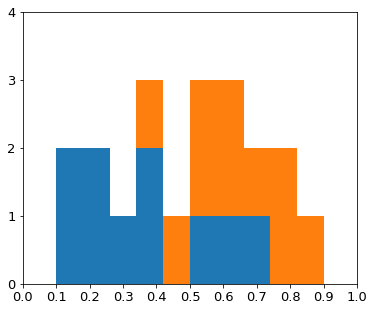

In [11]:
x0 = df[df['y_true']==0]['y_pred']
x1 = df[df['y_true']==1]['y_pred']

fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1)
ax.hist([x0, x1], bins=10, stacked=True)

plt.xticks(np.arange(0, 1.1, 0.1), fontsize =13)
plt.yticks(np.arange(0, 6, 1), fontsize = 13)

plt.ylim(0, 4)
plt.show()

#### ROC曲線とAUC(面積。0から1までの値。)

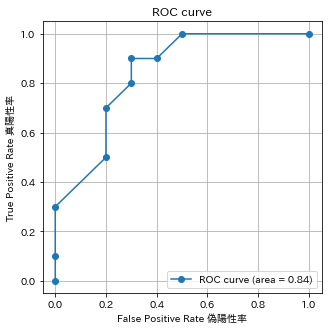

In [12]:
from sklearn import metrics
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np

# FPR, TPR(, しきい値) を算出
# fpr (False Positive Rate：偽陽性率)
# tpr (True Positive Rate：真陽性率)
# thres (Thresholds：閾値)
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred)
auc = metrics.auc(fpr, tpr)

# ROC曲線をプロット
plt.figure(figsize = (5, 5))
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc, marker='o')
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate 偽陽性率')
plt.ylabel('True Positive Rate 真陽性率')
plt.grid(True)